In [1]:
!pip install Sastrawi
!pip install gensim pyldavis
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 51.1 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.2
    Uninstalling scipy-1.15.2:
      Successfully uninstalled scipy-1.15.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
dopamine-rl 4.1.2 requires gymnasium>=1.0.0, but you have gymnasium 0.29.0 which is incompatible.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.2.2 which is incompatible.
plotnine 0.14.5 requir

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/kaggle/input/komunitasmarah/fixDataset.csv')
df

,date,username,content
0,2025-02-20T17:04:04.000Z,@notsopurplesky,BACOTTT BGTT KONTOLLLLL PENYEPONG WOWO
1,2025-02-20T17:05:19.000Z,@steroxoo,BABI JADI BACKBURNER DIPERTEMANAN GA ENAK BGT ...
2,2025-02-20T17:06:14.000Z,@agunbuhori,Heran gw ada orang minjem uang puluhan juta ja...
3,2025-02-20T17:06:39.000Z,@weneedmorem0ney,"Kata gua sih anjing, gua minta tolong dan ngom..."
4,2025-02-20T17:07:16.000Z,@namsrchive,EH ANJING TOLOL FAEDAHNYA NGEFAKER TUH APASIII...
...,...,...,...
38951,2025-07-31T23:34:03.000Z,@jinjuyaish,"Tau gak, aku 2 hari yang lalu masa iya aku dic..."
38952,2025-07-31T23:34:50.000Z,@just_anotherea,PPATK TOLOL.
38953,2025-07-31T23:35:02.000Z,@buttercia,helppp guys mantan gw ngancem mau sebarin pap ...
38954,2025-07-31T23:36:13.000Z,@ccheeeeeshiyya,"SUMPA YA GUA MARAH BGTTT AJGGGGGGGG, gimana ma..."


In [4]:
df = df[['content']]
df

,content
0,BACOTTT BGTT KONTOLLLLL PENYEPONG WOWO
1,BABI JADI BACKBURNER DIPERTEMANAN GA ENAK BGT ...
2,Heran gw ada orang minjem uang puluhan juta ja...
3,"Kata gua sih anjing, gua minta tolong dan ngom..."
4,EH ANJING TOLOL FAEDAHNYA NGEFAKER TUH APASIII...
...,...
38951,"Tau gak, aku 2 hari yang lalu masa iya aku dic..."
38952,PPATK TOLOL.
38953,helppp guys mantan gw ngancem mau sebarin pap ...
38954,"SUMPA YA GUA MARAH BGTTT AJGGGGGGGG, gimana ma..."


In [5]:
df.shape

(38956, 1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38956 entries, 0 to 38955
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  38954 non-null  object
dtypes: object(1)
memory usage: 304.5+ KB


In [7]:
df.duplicated().sum()

1

In [8]:
df = df.drop_duplicates(keep ='first')

In [9]:
df.isnull().sum()

content    1
dtype: int64

In [10]:
df.isna().any()

content    True
dtype: bool

In [11]:
df.describe()

,content
count,38954
unique,38954
top,i beg you you're the most manusia kontol in th...
freq,1


In [12]:
df.loc[:, 'content'] = df['content'].fillna('').astype(str)

In [13]:
df = df[df['content'].str.strip() != ''].copy()

In [14]:
df.reset_index(drop=True, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38954 entries, 0 to 38953
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  38954 non-null  object
dtypes: object(1)
memory usage: 304.5+ KB


In [16]:
import nltk
nltk.download('punkt')
import re

def remove_punct(text):
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)      # Remove @user
    text = re.sub(r'#\w+', '', text)                # Remove hashtags
    text = re.sub(r'RT[\s]+', '', text)             # Remove retweet marker
    text = re.sub(r'https?://\S+', '', text)        # Remove links
    text = re.sub(r'[^A-Za-z ]', ' ', text)         # Remove non-alpha
    text = re.sub(r'\s+', ' ', text).strip()        # Remove multiple spaces

    return text

df.loc[:, 'remove_punctuation'] = df['content'].apply(remove_punct)

df.to_csv('/kaggle/working/preprocessed_dataset.csv', index=False)

print(df[['content', 'remove_punctuation']].head(10))

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                             content  \
0             BACOTTT BGTT KONTOLLLLL PENYEPONG WOWO   
1  BABI JADI BACKBURNER DIPERTEMANAN GA ENAK BGT ...   
2  Heran gw ada orang minjem uang puluhan juta ja...   
3  Kata gua sih anjing, gua minta tolong dan ngom...   
4  EH ANJING TOLOL FAEDAHNYA NGEFAKER TUH APASIII...   
5  Ada gak yang kelamaan nganggur di rumah malah ...   
6  DOAIN GUE LAGI RIBUT SAMA BANYAK KOMENAN DI VT...   
7  anjing capek bgt punya badan kurus bb dr 41 tu...   
8            Normalize bully yang punya pacar parcok   
9  MAU MARAH BGT tp ujungnya nangis. Aku baru bel...   

                                  remove_punctuation  
0             BACOTTT BGTT KONTOLLLLL PENYEPONG WOWO  
1  BABI JADI BACKBURNER DIPERTEMANAN GA ENAK BGT ...  
2  Heran gw ada orang minjem uang puluhan juta ja...  
3  Kata gua sih anjing gua minta tolong dan ngomo...  
4  EH ANJING TOLOL FAEDAHNYA NGEFAKER TUH APASIII...  
5  Ada gak yang kelamaan nganggur di rumah malah ... 

In [17]:
df.loc[:, 'case_folding'] = df['remove_punctuation'].str.lower()

df.to_csv('/kaggle/working/preprocessed_dataset.csv', index=False)

print(df[['remove_punctuation', 'case_folding']].head(10))

                                  remove_punctuation  \
0             BACOTTT BGTT KONTOLLLLL PENYEPONG WOWO   
1  BABI JADI BACKBURNER DIPERTEMANAN GA ENAK BGT ...   
2  Heran gw ada orang minjem uang puluhan juta ja...   
3  Kata gua sih anjing gua minta tolong dan ngomo...   
4  EH ANJING TOLOL FAEDAHNYA NGEFAKER TUH APASIII...   
5  Ada gak yang kelamaan nganggur di rumah malah ...   
6  DOAIN GUE LAGI RIBUT SAMA BANYAK KOMENAN DI VT...   
7  anjing capek bgt punya badan kurus bb dr turun...   
8            Normalize bully yang punya pacar parcok   
9  MAU MARAH BGT tp ujungnya nangis Aku baru beli...   

                                        case_folding  
0             bacottt bgtt kontolllll penyepong wowo  
1  babi jadi backburner dipertemanan ga enak bgt ...  
2  heran gw ada orang minjem uang puluhan juta ja...  
3  kata gua sih anjing gua minta tolong dan ngomo...  
4  eh anjing tolol faedahnya ngefaker tuh apasiii...  
5  ada gak yang kelamaan nganggur di rumah malah ... 

In [18]:
df.duplicated(subset=['case_folding']).sum()

67

In [19]:
print(f"Total data awal: {len(df)}")

df_unique = df.drop_duplicates(subset=['case_folding'], keep='first').copy()

print(f"Total data bersih: {len(df_unique)}")

Total data awal: 38954
Total data bersih: 38887


In [20]:
df_unique.shape

(38887, 3)

In [21]:
df_unique.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38887 entries, 0 to 38953
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   content             38887 non-null  object
 1   remove_punctuation  38887 non-null  object
 2   case_folding        38887 non-null  object
dtypes: object(3)
memory usage: 1.2+ MB


In [22]:
from nltk.tokenize import word_tokenize

df_unique.loc[:, 'tokens'] = df_unique['case_folding'].apply(word_tokenize)

df_unique.to_csv('/kaggle/working/preprocessed_dataset.csv', index=False)

print(df_unique[['case_folding', 'tokens']].head(10))

                                        case_folding  \
0             bacottt bgtt kontolllll penyepong wowo   
1  babi jadi backburner dipertemanan ga enak bgt ...   
2  heran gw ada orang minjem uang puluhan juta ja...   
3  kata gua sih anjing gua minta tolong dan ngomo...   
4  eh anjing tolol faedahnya ngefaker tuh apasiii...   
5  ada gak yang kelamaan nganggur di rumah malah ...   
6  doain gue lagi ribut sama banyak komenan di vt...   
7  anjing capek bgt punya badan kurus bb dr turun...   
8            normalize bully yang punya pacar parcok   
9  mau marah bgt tp ujungnya nangis aku baru beli...   

                                              tokens  
0       [bacottt, bgtt, kontolllll, penyepong, wowo]  
1  [babi, jadi, backburner, dipertemanan, ga, ena...  
2  [heran, gw, ada, orang, minjem, uang, puluhan,...  
3  [kata, gua, sih, anjing, gua, minta, tolong, d...  
4  [eh, anjing, tolol, faedahnya, ngefaker, tuh, ...  
5  [ada, gak, yang, kelamaan, nganggur, di, rumah... 

In [23]:
import pandas as pd

mapping_df = pd.read_csv('/kaggle/input/normalisasi/normDict2.csv')

norm_dict = dict(
    zip(
        mapping_df['kata_tidak_baku'].astype(str).str.lower(),
        mapping_df['kata_normal'].astype(str).str.lower()
    )
)

def normalisasi(token_list):
    if not isinstance(token_list, list):
        return ""
    
    normalized_tokens = []
    
    for token in token_list:
        token = str(token).lower()
        normalized_token = norm_dict.get(token, token)
        normalized_tokens.append(normalized_token)

    return ' '.join(normalized_tokens)

df_unique.loc[:, 'normalize'] = df_unique['tokens'].apply(normalisasi)

df_unique.to_csv('/kaggle/working/preprocessed_dataset.csv', index=False)

print(df_unique[['tokens', 'normalize']].head(10))

                                              tokens  \
0       [bacottt, bgtt, kontolllll, penyepong, wowo]   
1  [babi, jadi, backburner, dipertemanan, ga, ena...   
2  [heran, gw, ada, orang, minjem, uang, puluhan,...   
3  [kata, gua, sih, anjing, gua, minta, tolong, d...   
4  [eh, anjing, tolol, faedahnya, ngefaker, tuh, ...   
5  [ada, gak, yang, kelamaan, nganggur, di, rumah...   
6  [doain, gue, lagi, ribut, sama, banyak, komena...   
7  [anjing, capek, bgt, punya, badan, kurus, bb, ...   
8     [normalize, bully, yang, punya, pacar, parcok]   
9  [mau, marah, bgt, tp, ujungnya, nangis, aku, b...   

                                           normalize  
0                 bacot banget kontol penyepong wowo  
1  babi jadi backburner dipertemanan tidak enak b...  
2  heran saya ada orang pinjam uang puluhan juta ...  
3  kata saya sih anjing saya minta tolong dan ber...  
4  eh anjing tolol faedahnya ngefaker tuh apa kam...  
5  ada tidak yang kelamaan nganggur di rumah mala... 

In [24]:
import pandas as pd
import nltk
from nltk.corpus import stopwords

try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

stop_words = set(stopwords.words('indonesian'))

addition = {
    'anjing', 'kontol', 'bangsat', 'tahi', 'goblok', 'tolol', 'ngentot', 'bgst', 'kntl', 'sih',
    'tuh', 'nya', 'kalo', 'pas', 'udh', 'bgt', 'kayak', 'gini', 'itu', 'aja', 'shibal', 'kamu', 
    'monyet', 'babi', 'fak', 'fuck', 'fakkkk', 'anjir', 'cok', 'nang', 'kak', 'this', 'pantek', 
    'neng', 'bangke', 'astaga', 'buset', 'the', 'wni', 'all', 'what', 'day', 'just', 'anjjjj', 
    'that', 'pick', 'after', 'people', 'not', 'bat', 'wkwkwkwk', 'duh', 'bangsatt', 'anjirrrr', 
    'real', 'bitch', 'pen', 'bpk', 'and', 'like', 'kentot', 'anjirr', 'dih', 'nyari', 'memek', 
    'ngentod', 'bnr', 'ngeliat', 'bajingan', 'brengsek', 'you', 'tot', 'puki', 'wkwk', 'wkwkwk', 
    'kau', 'your', 'titik', 'tau', 'sok', 'nyokap', 'ngerokok', 'cuih', 'asuu', 'asu', 'yang',
    'berengsek', 'aing', 'ngechat', 'banget', 'ntar', 'mba', 'jancok', 'bet', 'mentang', 'nge', 
    'bajing', 'smp', 'hahaha', 'ajaa', 'orng', 'huhuhu', 'anjjj', 'gpp', 'saja', 'dan'
}

stop_words.update(addition)

def remove_stopwords(text):
    if not isinstance(text, str):
        return ""
    
    words = text.split()
    filtered_words = [
        word for word in words
        if word.lower() not in stop_words
    ]
    
    return ' '.join(filtered_words)

df_unique.loc[:, 'stopwords'] = df_unique['normalize'].apply(remove_stopwords)

df_unique.to_csv('/kaggle/working/preprocessed_dataset.csv', index=False)

print(df_unique[['normalize', 'stopwords']].head(10))

                                           normalize  \
0                 bacot banget kontol penyepong wowo   
1  babi jadi backburner dipertemanan tidak enak b...   
2  heran saya ada orang pinjam uang puluhan juta ...   
3  kata saya sih anjing saya minta tolong dan ber...   
4  eh anjing tolol faedahnya ngefaker tuh apa kam...   
5  ada tidak yang kelamaan nganggur di rumah mala...   
6  doain saya lagi ribut sama banyak komenan di v...   
7  anjing capek banget punya badan kurus bb dari ...   
8            normalize bully yang punya pacar parcok   
9  mau marah banget tapi ujungnya nangis saya bar...   

                                           stopwords  
0                               bacot penyepong wowo  
1  backburner dipertemanan enak mending backburne...  
2  heran orang pinjam uang puluhan juta janji bay...  
3  tolong berbicara so begaya kaya orang superior...  
4  eh faedahnya ngefaker saking insecurenya kah p...  
5  nganggur rumah menciptakan toxic relation kelu... 

In [25]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
    if not isinstance(text, str):
        return text
    words = text.split()
    stemmed_words = [stemmer.stem (word) for word in words]
       
    return ' '.join(stemmed_words)

df_unique.loc[:, 'stemming'] = df_unique['stopwords'].apply(stem_text)

df_unique.to_csv('/kaggle/working/preprocessed_dataset.csv', index=False)

print(df_unique[['stopwords', 'stemming']].head(10))

                                           stopwords  \
0                               bacot penyepong wowo   
1  backburner dipertemanan enak mending backburne...   
2  heran orang pinjam uang puluhan juta janji bay...   
3  tolong berbicara so begaya kaya orang superior...   
4  eh faedahnya ngefaker saking insecurenya kah p...   
5  nganggur rumah menciptakan toxic relation kelu...   
6  doain ribut komenan vt gara hafal lagu darah j...   
7       capek badan kurus bb turun turun habis turun   
8                       normalize bully pacar parcok   
9  marah ujungnya nangis beli set buku menurutku ...   

                                            stemming  
0                               bacot penyepong wowo  
1  backburner teman enak mending backburner lawan...  
2  heran orang pinjam uang puluh juta janji bayar...  
3  tolong bicara so begaya kaya orang superior gatau  
4  eh faedah ngefaker saking insecurenya kah paka...  
5  nganggur rumah cipta toxic relation keluarga k... 

In [26]:
import pandas as pd

def remove_short_words(text, min_char_length=3):

    if not isinstance(text, str):
        return ""
    tokens = text.split()
    filtered_tokens = [token for token in tokens if len(token) >= min_char_length]

    return ' '.join(filtered_tokens)

df_unique.loc[:, 'cleaned_text'] = df_unique['stemming'].apply(remove_short_words)

df_unique.to_csv('/kaggle/working/preprocessed_dataset.csv', index=False)

print(df_unique[['stemming', 'cleaned_text']].head(10))

                                            stemming  \
0                               bacot penyepong wowo   
1  backburner teman enak mending backburner lawan...   
2  heran orang pinjam uang puluh juta janji bayar...   
3  tolong bicara so begaya kaya orang superior gatau   
4  eh faedah ngefaker saking insecurenya kah paka...   
5  nganggur rumah cipta toxic relation keluarga k...   
6  doain ribut komenan vt gara hafal lagu darah j...   
7       capek badan kurus bb turun turun habis turun   
8                       normalize bully pacar parcok   
9  marah ujung nang beli set buku turut mahal dap...   

                                        cleaned_text  
0                               bacot penyepong wowo  
1  backburner teman enak mending backburner lawan...  
2  heran orang pinjam uang puluh juta janji bayar...  
3     tolong bicara begaya kaya orang superior gatau  
4  faedah ngefaker saking insecurenya kah pakai p...  
5  nganggur rumah cipta toxic relation keluarga k... 

In [27]:
from gensim import corpora, models

texts = [str(t).split() for t in df_unique['cleaned_text'].fillna('').tolist()]
texts = [t for t in texts if len(t) > 0]

def build_corpus(texts):
    dictionary = corpora.Dictionary(texts)
    dictionary.filter_extremes(no_below=20, no_above=0.5)
    
    corpus_bow = [dictionary.doc2bow(doc) for doc in texts]
    
    tfidf_model = models.TfidfModel(corpus_bow)
    corpus_tfidf = tfidf_model[corpus_bow]
    
    return dictionary, corpus_bow, corpus_tfidf
    
dictionary, corpus_bow, corpus_tfidf = build_corpus(texts)

corpus_for_lda = corpus_tfidf

Num Topics = 1, Coherence Score = 0.3513
Num Topics = 2, Coherence Score = 0.3462
Num Topics = 3, Coherence Score = 0.3988
Num Topics = 4, Coherence Score = 0.4089
Num Topics = 5, Coherence Score = 0.4687
Num Topics = 6, Coherence Score = 0.4917
Num Topics = 7, Coherence Score = 0.4842
Num Topics = 8, Coherence Score = 0.4203
Num Topics = 9, Coherence Score = 0.5086
Num Topics = 10, Coherence Score = 0.4676
Num Topics = 11, Coherence Score = 0.4885
Num Topics = 12, Coherence Score = 0.4537
Num Topics = 13, Coherence Score = 0.4281
Num Topics = 14, Coherence Score = 0.4412
Num Topics = 15, Coherence Score = 0.4823


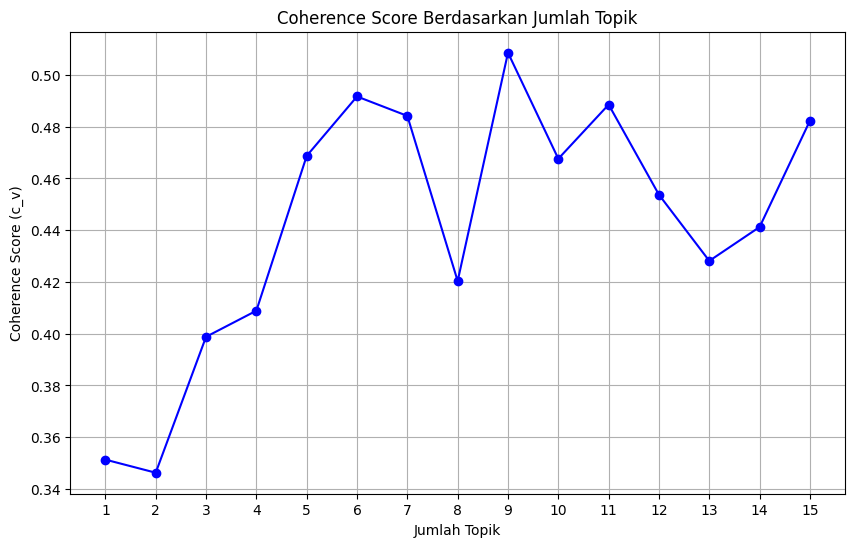

In [28]:
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel, LdaModel

coherence_scores = []
topic_range = range(1, 16)

for num_topics in topic_range:
    lda_model = LdaModel(
        corpus=corpus_for_lda,
        id2word=dictionary,
        num_topics=num_topics,
        random_state=42,
        passes=20,
        alpha='auto'
    )
    
    coherence_model = CoherenceModel(
        model=lda_model,
        texts=texts,
        dictionary=dictionary,
        coherence='c_v'
    )
    
    score = coherence_model.get_coherence()
    coherence_scores.append(score)
    print(f"Num Topics = {num_topics}, Coherence Score = {score:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(topic_range, coherence_scores, marker='o', linestyle='-', color='b')

plt.title('Coherence Score Berdasarkan Jumlah Topik')
plt.xlabel('Jumlah Topik')
plt.ylabel('Coherence Score (c_v)')
plt.xticks(topic_range)
plt.grid(True)

plt.savefig('grafik_coherence_score.png', bbox_inches='tight')
plt.show()

In [29]:
best_num_topics = topic_range[np.argmax(coherence_scores)]
print("Jumlah topik terbaik:", best_num_topics)

lda_model_final = LdaModel(
    corpus=corpus_for_lda,
    id2word=dictionary,
    num_topics=best_num_topics,
    random_state=42,
    passes=20,
    alpha='auto'
)

Jumlah topik terbaik: 9


In [30]:
for idx, topic in lda_model_final.print_topics(num_words=10):
    print(f"Topic {idx+1}: {topic}")

Topic 1: 0.025*"perintah" + 0.018*"jelek" + 0.015*"foto" + 0.011*"mahal" + 0.010*"blokir" + 0.010*"males" + 0.010*"rakyat" + 0.009*"dipake" + 0.009*"kemaren" + 0.009*"bagus"
Topic 2: 0.018*"lahir" + 0.016*"juni" + 0.013*"ngutang" + 0.013*"maki" + 0.013*"sidang" + 0.013*"toxic" + 0.012*"gatel" + 0.011*"risih" + 0.010*"napa" + 0.010*"waras"
Topic 3: 0.013*"mood" + 0.011*"leceh" + 0.011*"cantik" + 0.010*"ampun" + 0.010*"ayo" + 0.010*"macet" + 0.009*"kronologi" + 0.009*"dokter" + 0.008*"gigi" + 0.008*"lampu"
Topic 4: 0.013*"resign" + 0.012*"live" + 0.011*"ribut" + 0.011*"sosmed" + 0.011*"magic" + 0.009*"konoha" + 0.009*"lacak" + 0.009*"mbak" + 0.008*"sender" + 0.008*"jurus"
Topic 5: 0.014*"nyebelin" + 0.013*"aduh" + 0.013*"bahas" + 0.012*"tenang" + 0.011*"hah" + 0.011*"tahap" + 0.010*"energi" + 0.010*"cocok" + 0.010*"anggur" + 0.010*"dongo"
Topic 6: 0.017*"sayang" + 0.015*"rekening" + 0.014*"panas" + 0.014*"twitter" + 0.013*"bacot" + 0.013*"raja" + 0.012*"thread" + 0.011*"curhat" + 0.011*"

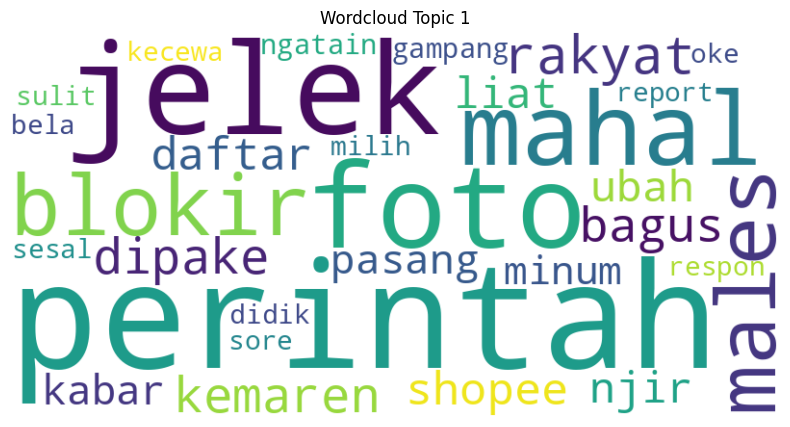

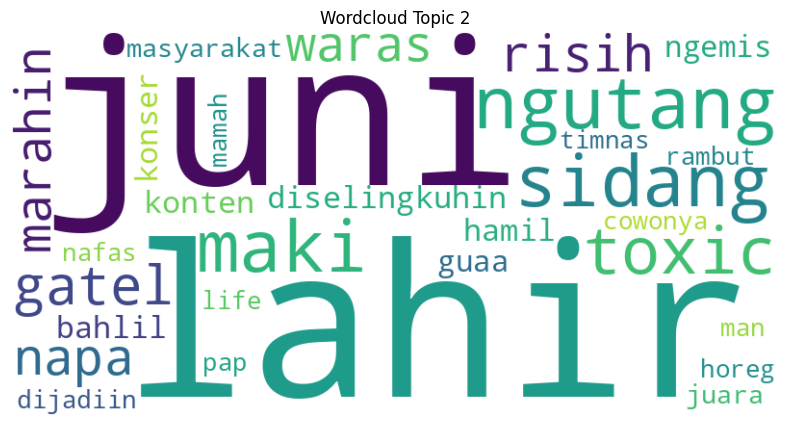

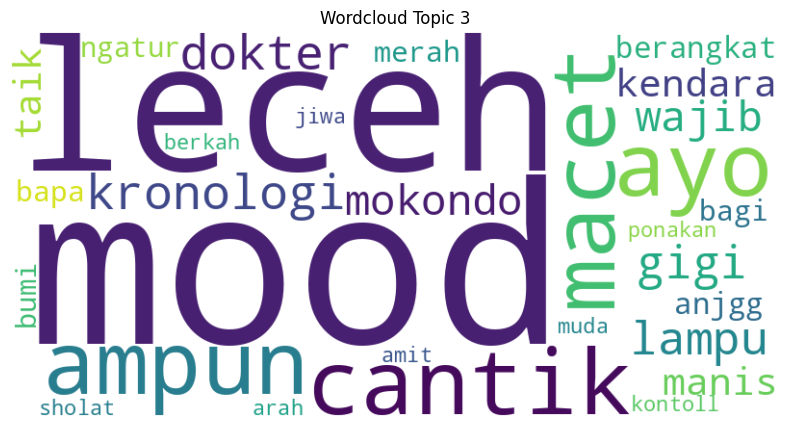

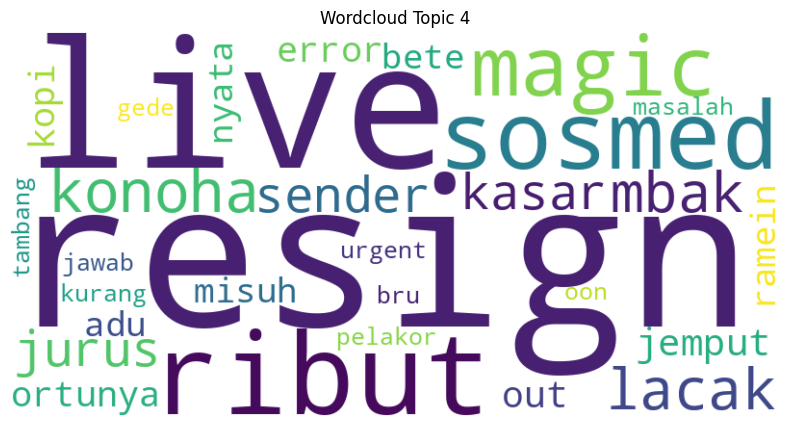

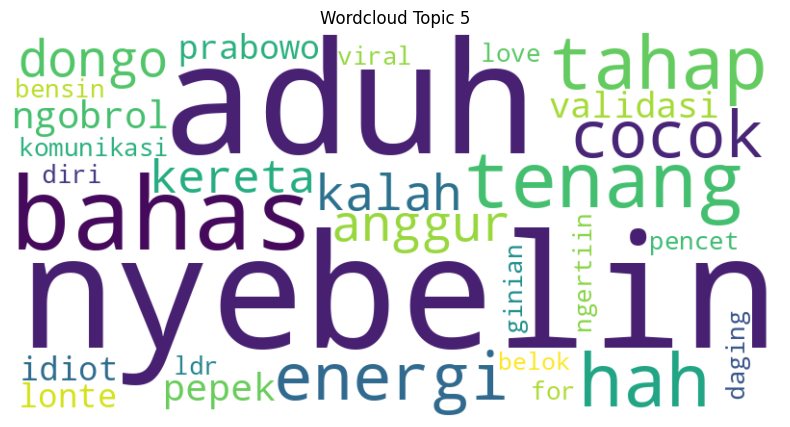

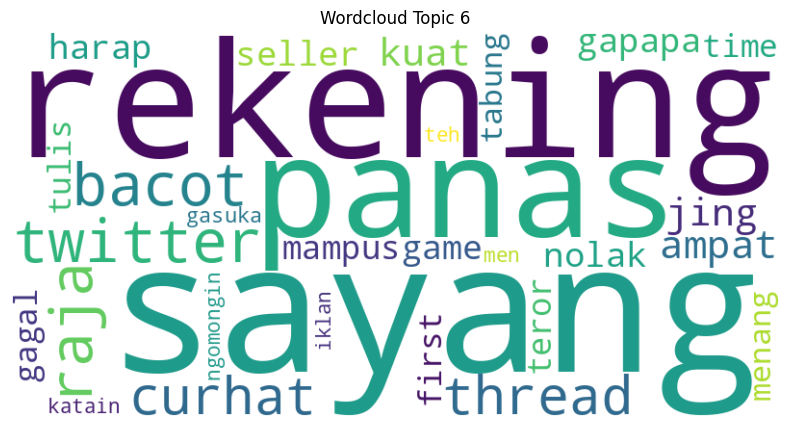

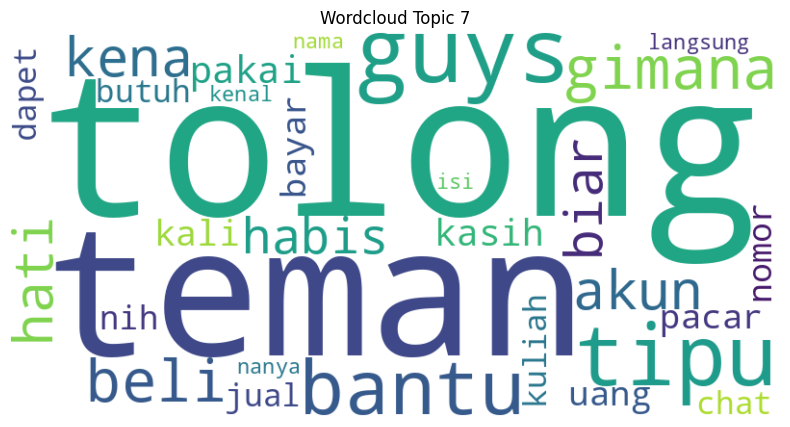

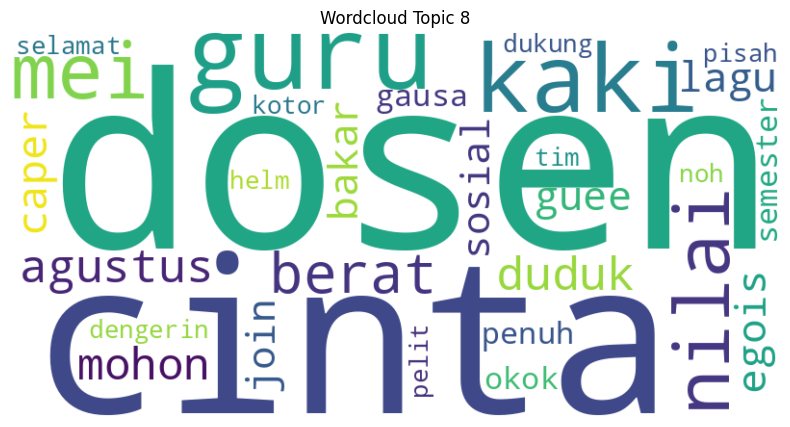

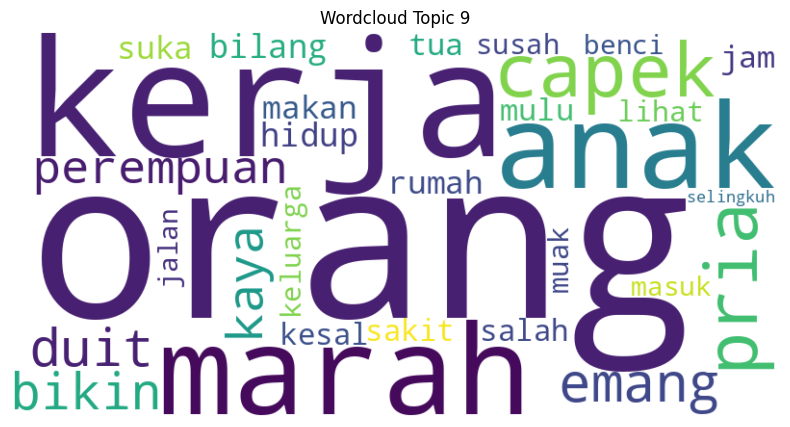

In [31]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

topics = lda_model_final.show_topics(
    num_topics=best_num_topics, 
    formatted=False, 
    num_words=30
)

topics = sorted(topics, key=lambda x: x[0])

for topic in topics:
    topic_id = topic[0]
    topic_words_list = topic[1]
    
    word_dict = dict(topic_words_list)
    
    wc = WordCloud(
        width=800, 
        height=400, 
        background_color='white',
        colormap='viridis',
        random_state=42 
    ).generate_from_frequencies(word_dict)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    
    plt.title(f"Wordcloud Topic {topic_id + 1}") 
    
    plt.savefig(f'wordcloud_topic_{topic_id + 1}.png', bbox_inches='tight')
    plt.show()

In [32]:
import pyLDAvis.gensim_models
import pyLDAvis

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(
    lda_model_final, 
    corpus_for_lda, 
    dictionary, 
    sort_topics=False
)

pyLDAvis.save_html(vis, 'lda_visualization.html')

pyLDAvis.display(vis)

In [33]:
def representative_data_topn(lda_model, corpus, texts, topic_id, top_n=20):
    topic_docs = []
    
    for i, doc in enumerate(corpus):
        topic_dist = lda_model.get_document_topics(doc)
        for t, p in topic_dist:
            if t == topic_id:
                topic_docs.append((i, texts[i], p))
    
    topic_docs = sorted(topic_docs, key=lambda x: x[2], reverse=True)
    return topic_docs[:top_n]

In [34]:
all_topics_data = []

for topic_id in range(lda_model_final.num_topics):
    docs = representative_data_topn(
        lda_model_final,
        corpus_for_lda,
        texts,
        topic_id=topic_id,
        top_n=20
    )
    
    for doc_id, text, prob in docs:
        all_topics_data.append({
            'topic_id': topic_id + 1,
            'document_id': doc_id,
            'probability': prob,
            'text': ' '.join(text) if isinstance(text, list) else text
        })

df_representative = pd.DataFrame(all_topics_data)
df_representative.head(20)

,topic_id,document_id,probability,text
0,1,1676,0.116751,badai angin ujan ngatain anggep perempuan gamp...
1,1,2260,0.115762,pasien bpjs tebus obat karna max hari tebus co...
2,1,2228,0.114840,sales tlp bahasa suka plintir update microsoft...
3,1,30529,0.114190,ukt mahal sulit masyarakat tengah bawah
4,1,2229,0.114154,hati mati allah sulit seru bela bangsa palesti...
5,1,18412,0.113479,apasih google maps dipake kudu update hajdkdls...
6,1,6321,0.112978,habis ngeledekin kakak anak diajarin kurikulum...
7,1,9081,0.112383,salah perintah kuliah tekunn nyumbang angka in...
8,1,20932,0.112036,orang selingkuh mikirin moment moment bahagia ...
9,1,17348,0.111765,populasi semut tingkat gimanaa sii makan disem...


In [35]:
output_path = '/kaggle/working/representative_tweets.csv'
df_representative.to_csv(output_path, index=False)

print("File berhasil disimpan di:", output_path)

File berhasil disimpan di: /kaggle/working/representative_tweets.csv
